In [53]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)
print("Training target shape: ", y_train.shape)
print("Testing target shape: ", y_test.shape)
print("Validation target shape: ", y_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)
Training target shape:  (108,)
Testing target shape:  (36,)
Validation target shape:  (36,)


In [54]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["Accx", "Accy", "Accz", "Label"])
df

Accx      Accy      Accz  Label
0      0.973608 -0.184475 -0.282197    5.0
1      0.976087 -0.186779 -0.284879    5.0
2      0.977865 -0.191836 -0.289169    5.0
3      0.979638 -0.191792 -0.291794    5.0
4      0.982244 -0.189156 -0.288260    5.0
...         ...       ...       ...    ...
53995  0.730058 -0.197915 -0.066743    2.0
53996  0.696212 -0.149662 -0.059822    2.0
53997  0.731536 -0.162198 -0.049890    2.0
53998  0.762215 -0.176539 -0.038009    2.0
53999  0.764438 -0.205092 -0.028247    2.0

[54000 rows x 4 columns]


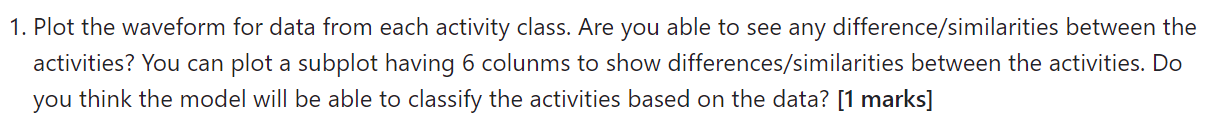


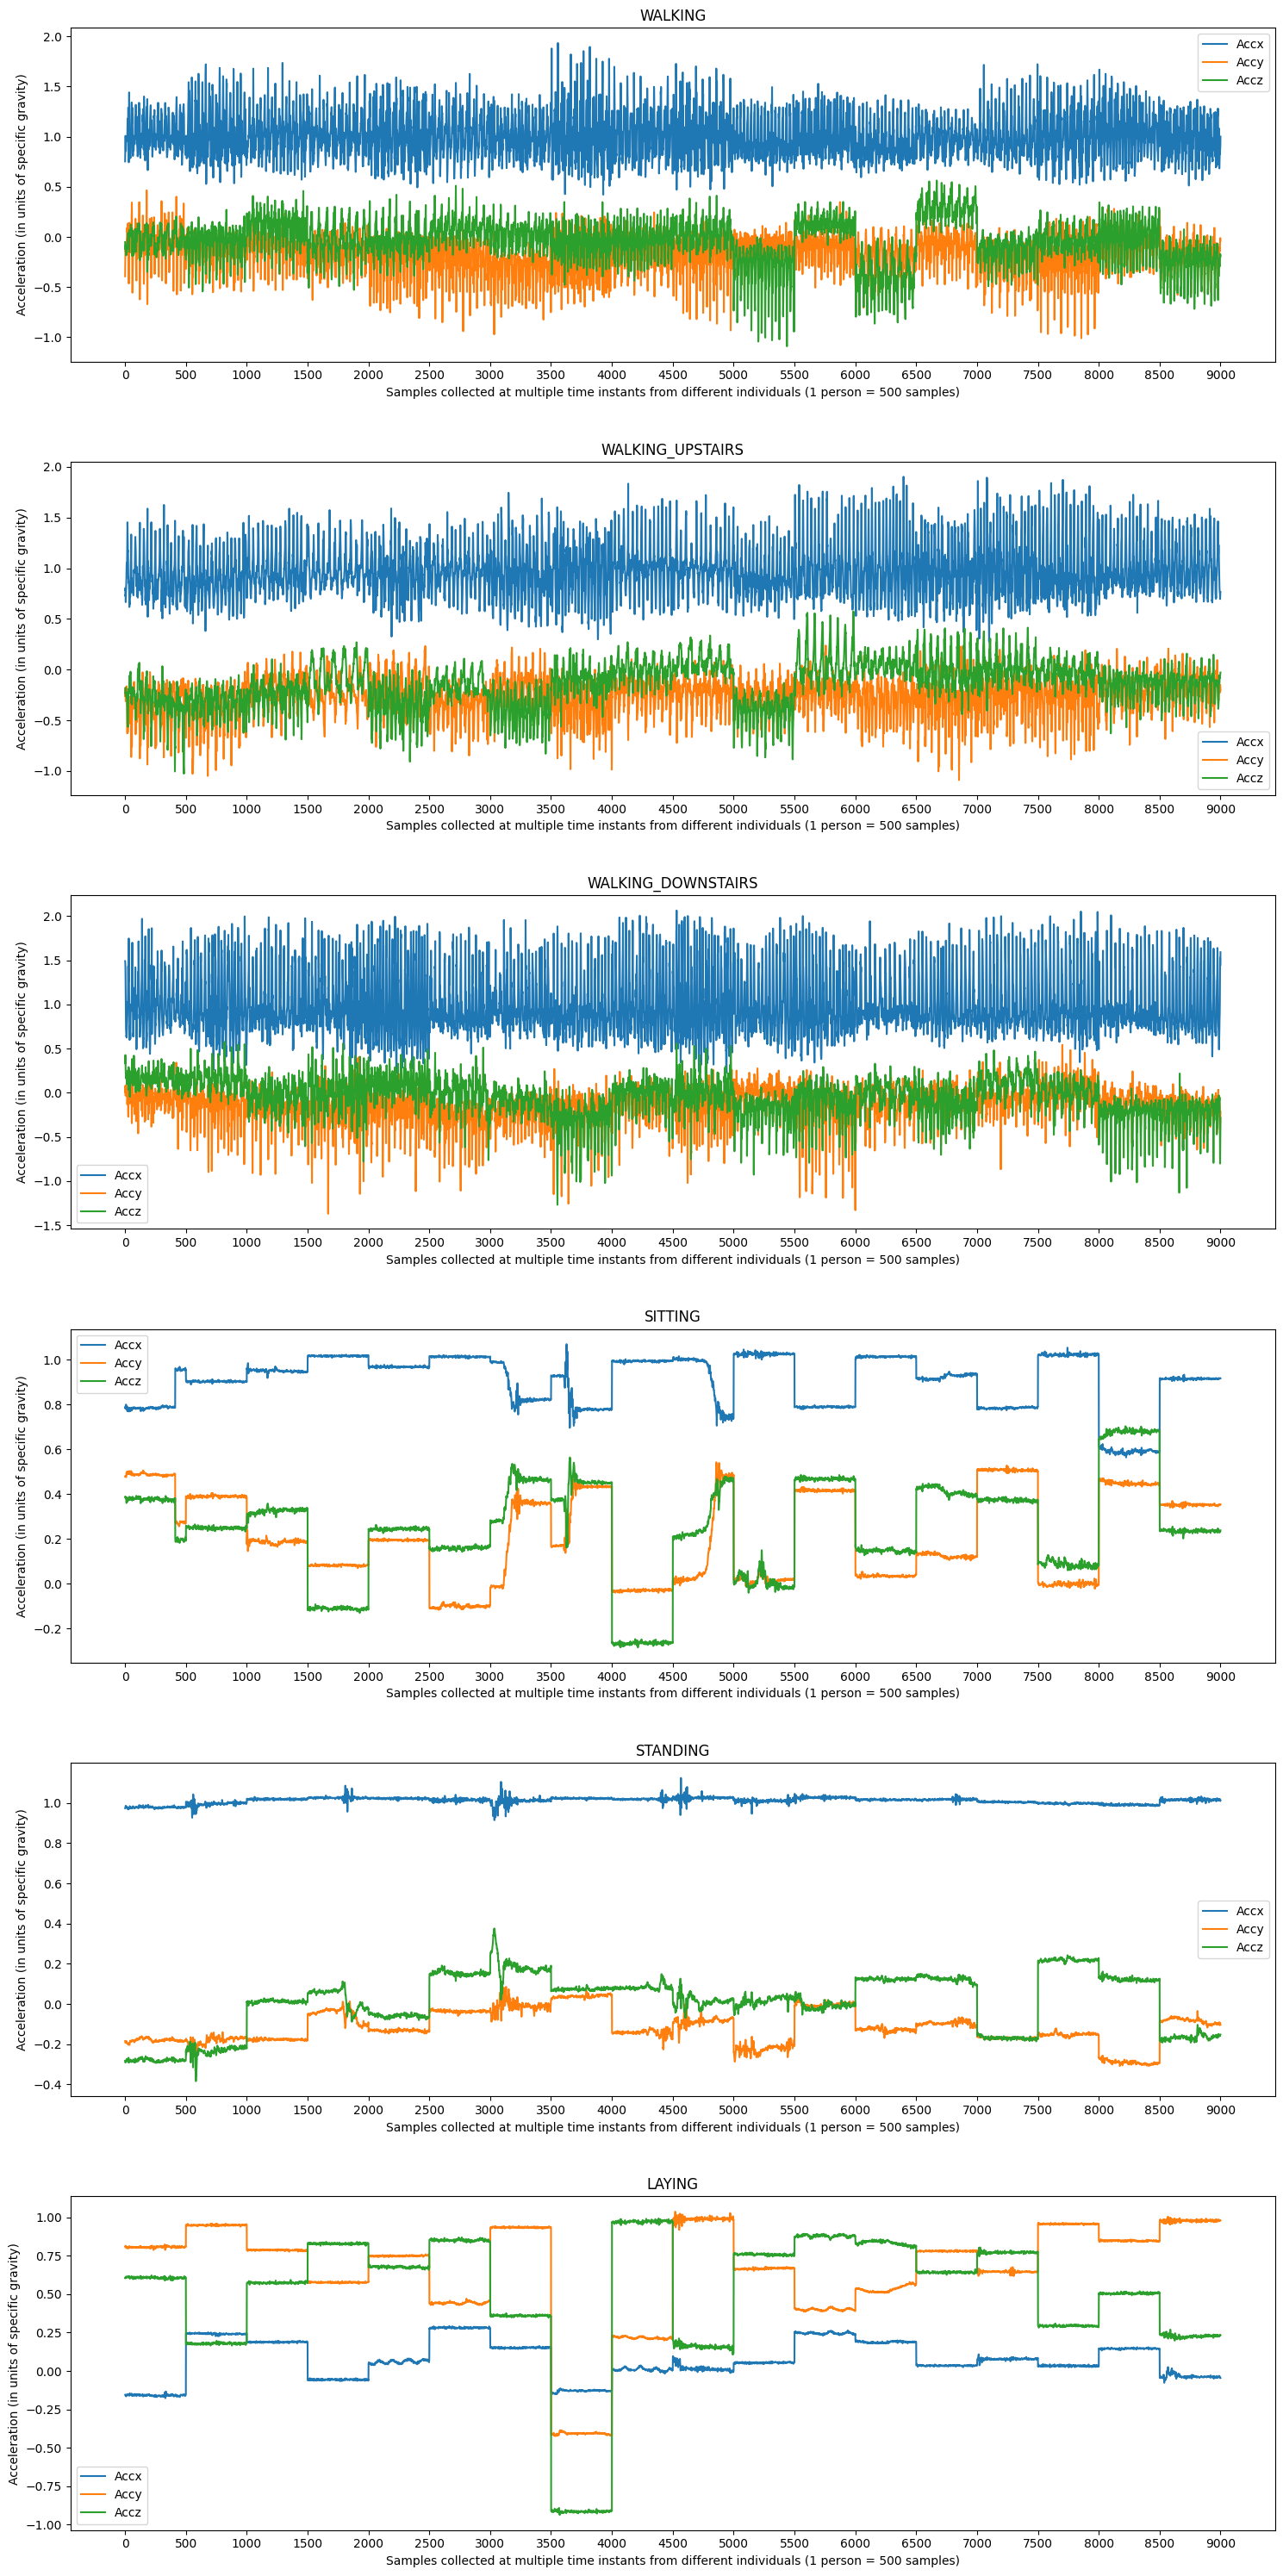

In [57]:
import matplotlib.pyplot as plt 

# Create the figure and subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

# Iterate through each label and plot the accelerations
for i, label in enumerate(classes.keys()):
    
    data = df[df["Label"] == classes[label]]
    consecutive_index = range(1, len(data) + 1)
    axes[i].plot(consecutive_index, data["Accx"], label="Accx")
    axes[i].plot(consecutive_index, data["Accy"], label="Accy")
    axes[i].plot(consecutive_index, data["Accz"], label="Accz")
    axes[i].set_xlabel("Samples collected at multiple time instants from different individuals (1 person = 500 samples)")
    axes[i].set_ylabel("Acceleration (in units of specific gravity)")
    axes[i].set_xticks(range(0, len(consecutive_index) + 1, 500),  # Ticks every 200 points
               ["{}".format(i) for i in range(0, len(consecutive_index) + 1, 500)])  # Custom labels
    axes[i].set_title(label) 
    axes[i].legend()


# Adjust layout and display the plot

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


---

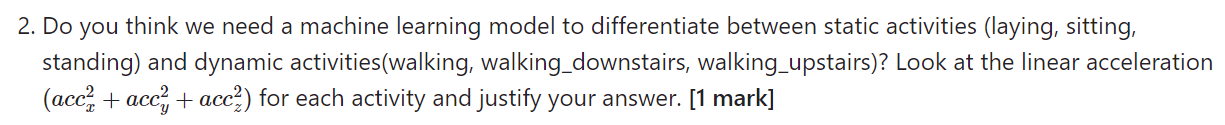

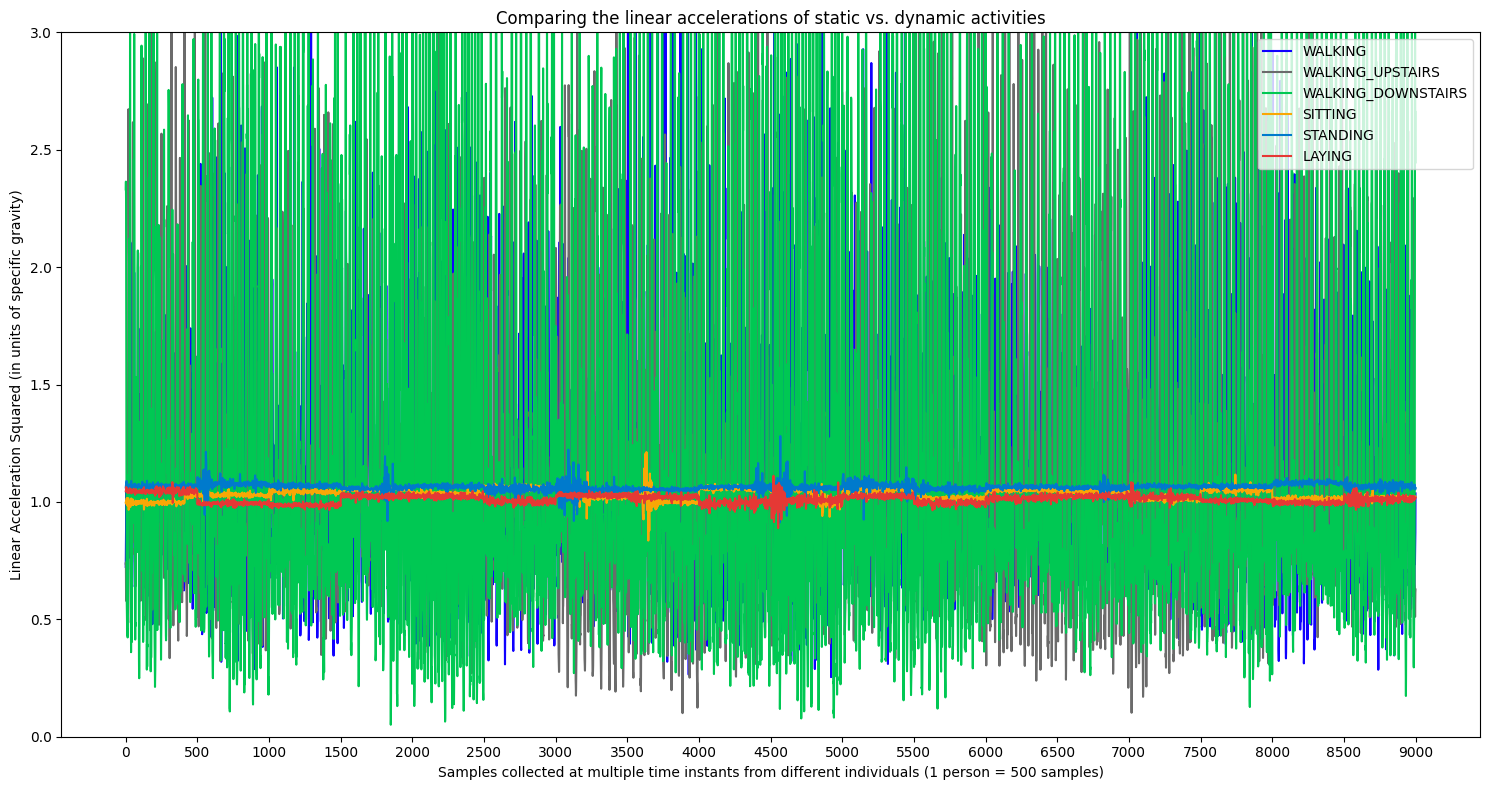

In [9]:
static_activities = {"SITTING":4,"STANDING":5,"LAYING":6}
dynamic_activities = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3}

colors = {
    "WALKING": "#1000FF",  
    "WALKING_UPSTAIRS": "#6B6B6B", 
    "WALKING_DOWNSTAIRS": "#00C853", 
    "SITTING": "#F9A706",  
    "STANDING": "#007ACC", 
    "LAYING": "#E53935",  
}

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

# Iterate through each label and plot the accelerations
for i, label in enumerate(classes.keys()):
    
    data = df[df["Label"] == classes[label]]
    consecutive_index = range(1, len(data) + 1)
    lin_acc_squared = data['Accx'] ** 2 + data['Accy'] ** 2 + data['Accz'] ** 2
    df.loc[df["Label"] == classes[label],"Linaccsq"] = lin_acc_squared

    axes.plot(consecutive_index, lin_acc_squared, label = label, color = colors[label], alpha = 1)
    axes.set_xlabel("Samples collected at multiple time instants from different individuals (1 person = 500 samples)")
    axes.set_ylabel("Linear Acceleration Squared (in units of specific gravity)")  
    axes.legend()

# Adjust layout and display the plot
plt.xticks(range(0, len(consecutive_index) + 1, 500),  # Ticks every 200 points
               ["{}".format(i) for i in range(0, len(consecutive_index) + 1, 500)])  # Custom labels
plt.title("Comparing the linear accelerations of static vs. dynamic activities")
plt.ylim(bottom=0,top=3)
plt.tight_layout()
plt.show()

**Observation:** From the graph obtained above, it is clear that static activities (sitting, standing and laying) have their linear acceleration squared values centered around `1.0` and dynamic activities (walking, walking upstairs and walking downstairs), ranging approximately from `0` to `3`. Dynamic activities show multiple spikes for all the samples. 

Therefore, a machine learning model is **not required** to differentiate between static and dynamic activities. 

*Just a few conditional statements would do the job!*

---

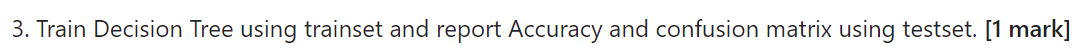

Accuracy on test data: 63.888888888888886%


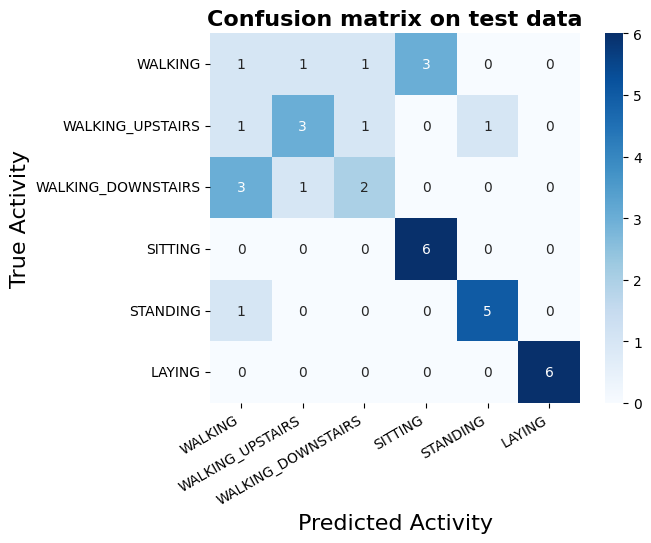

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=360)
model.fit(X_train.reshape(-1,500*3), y_train)
y_pred = model.predict(X_test.reshape(-1,500*3))

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy on test data: {accuracy * 100}%")
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.keys(), 
            yticklabels=classes.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


---

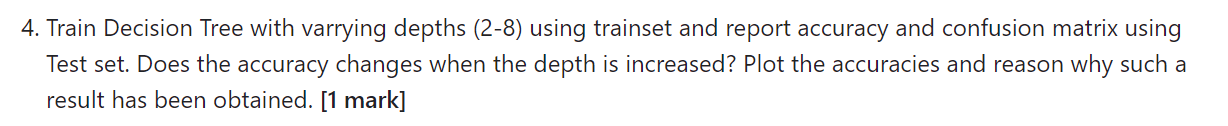

Depth = 2
Accuracy on test data: 44.44444444444444%


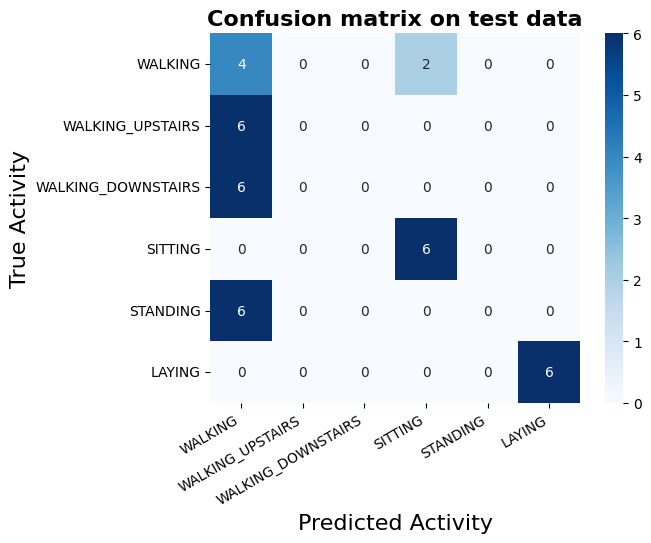


Depth = 3
Accuracy on test data: 61.111111111111114%


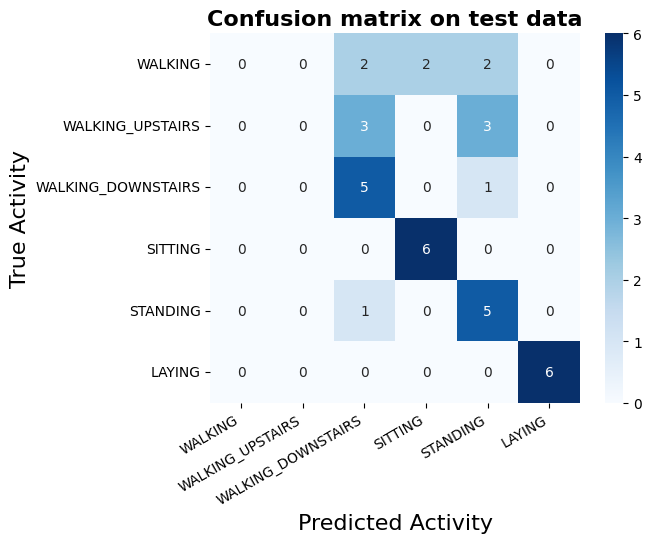


Depth = 4
Accuracy on test data: 63.888888888888886%


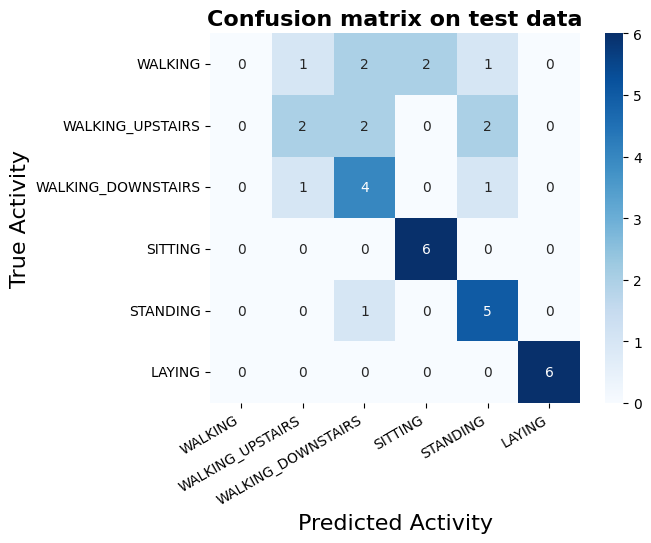


Depth = 5
Accuracy on test data: 61.111111111111114%


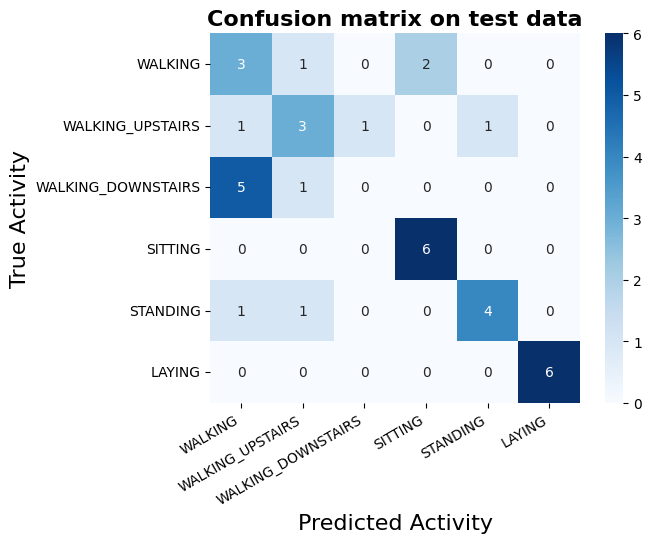


Depth = 6
Accuracy on test data: 63.888888888888886%


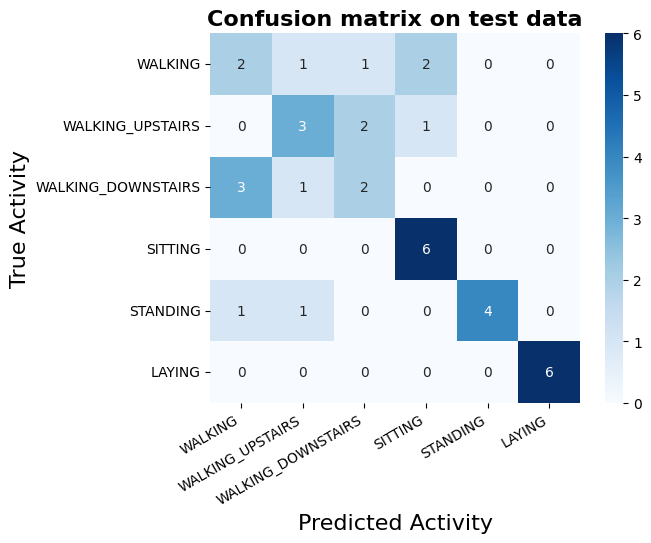


Depth = 7
Accuracy on test data: 61.111111111111114%


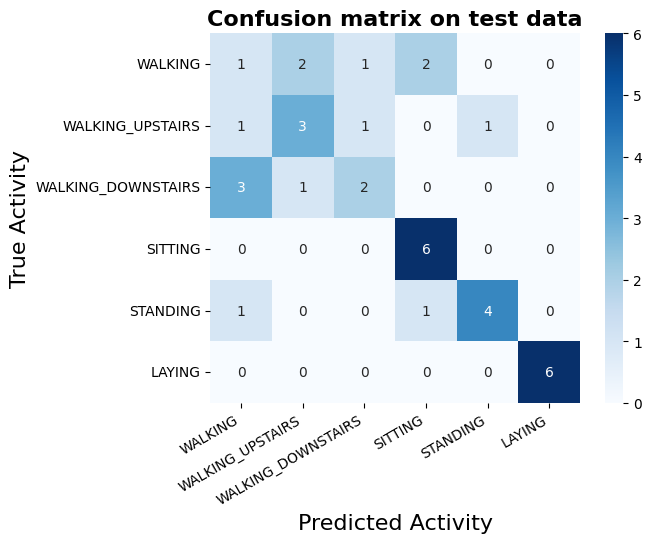


Depth = 8
Accuracy on test data: 63.888888888888886%


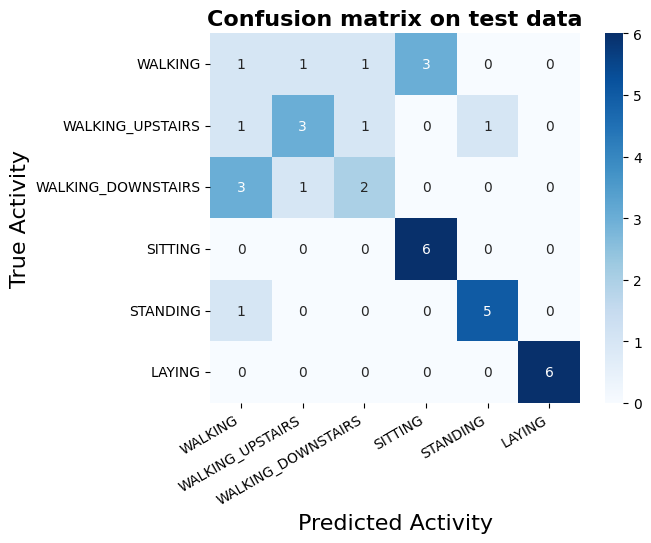

In [11]:
raw_accuracy_lst = []
for depth in range(2,9):    
    model = DecisionTreeClassifier(random_state=360, max_depth=depth)
    model.fit(X_train.reshape(-1,500*3), y_train)
    y_pred = model.predict(X_test.reshape(-1,500*3))

    accuracy = accuracy_score(y_test, y_pred)
    raw_accuracy_lst.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Depth = {depth}")
    print(f"Accuracy on test data: {accuracy * 100}%")
    sns.heatmap(conf_matrix,
                annot=True,
                square=True,
                cmap="Blues",
                fmt="d",
                xticklabels=classes.keys(), 
                yticklabels=classes.keys())
    plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
    plt.ylabel("True Activity", fontdict={'fontsize': 16})
    plt.title("Confusion matrix on test data", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    _ = plt.xticks(rotation=30, ha="right")
    plt.show()
    print("="*100, end = "\n\n")

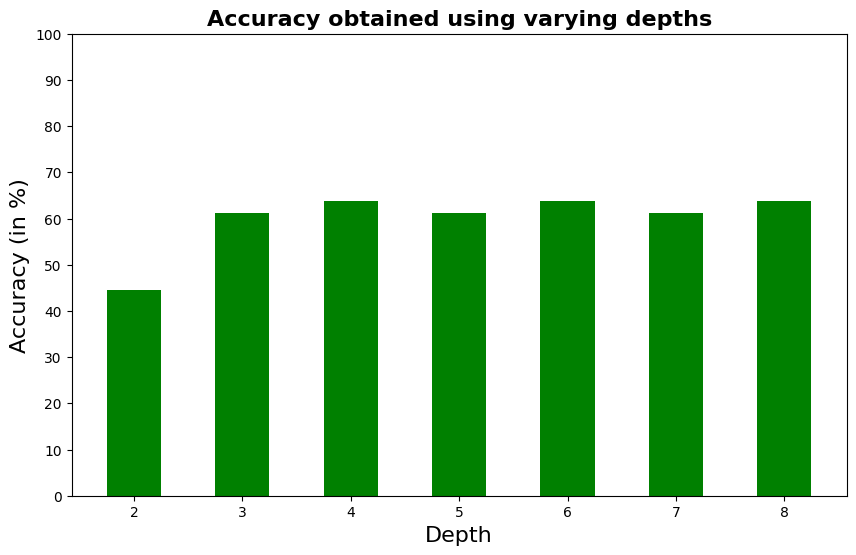

In [12]:
plt.figure(figsize=(10,6))
ind = np.arange(2,9)  
width = 0.5
plt.bar(ind, tuple(map(lambda x: 100*x, raw_accuracy_lst)), width, color = "green", label = "Accuracy using raw data")
plt.xlabel("Depth", fontdict={'fontsize': 16})
plt.ylabel("Accuracy (in %)", fontdict={'fontsize': 16})
plt.ylim((0,100))
plt.yticks(range(0,101,10))
plt.title("Accuracy obtained using varying depths", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

**Observation:** With increasing depth, the accuracy increases intially but shows some minor fluctuations after *depth = 4* and settles around `60%`

---

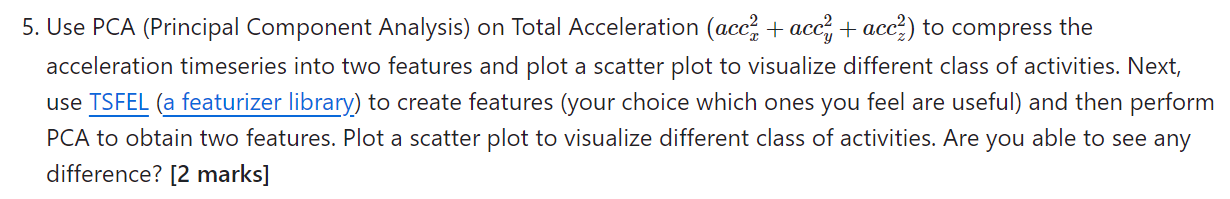

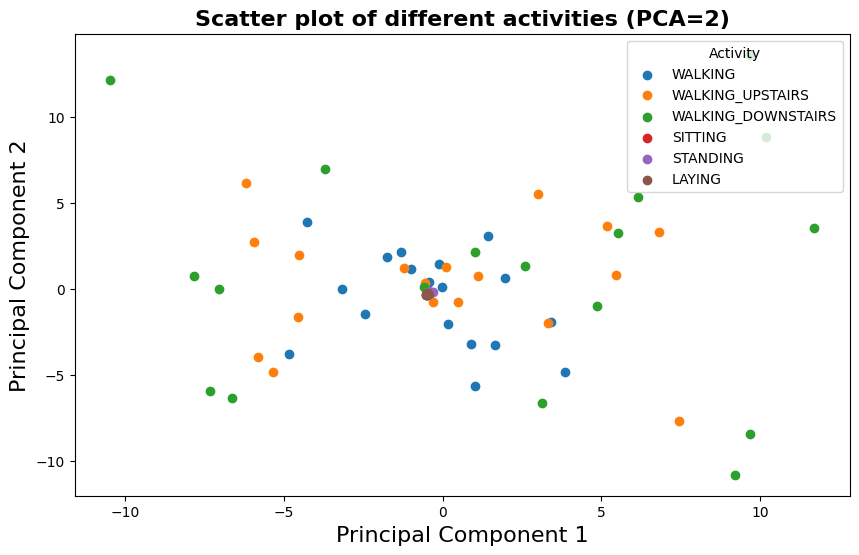

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(df['Linaccsq'].values.reshape(-1, 500))

labels = pd.Series(df['Label'].values.reshape(-1, 500).mean(axis=1))
unique_labels = sorted(pd.unique(labels))

reversed_classes = {value: key for key, value in classes.items()}

plt.figure(figsize=(10, 6))

for label in unique_labels:
        plt.scatter(X_train_reduced[labels == label, 0], X_train_reduced[labels == label, 1], label=reversed_classes.get(label))

plt.xlabel("Principal Component 1", fontdict={'fontsize': 16})
plt.ylabel("Principal Component 2", fontdict={'fontsize': 16})
plt.legend(title="Activity", loc="upper right")
plt.title("Scatter plot of different activities (PCA=2)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()


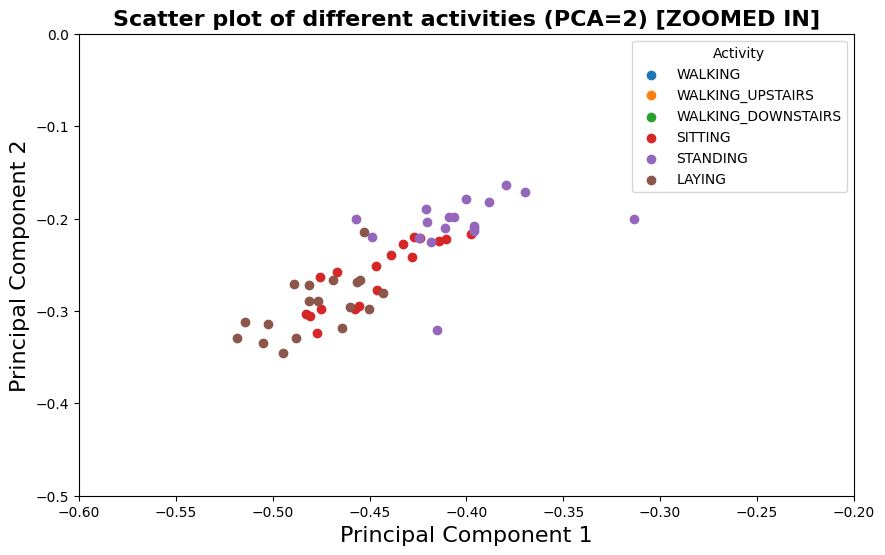

In [14]:
plt.figure(figsize=(10, 6))
for label in unique_labels:
        plt.scatter(X_train_reduced[labels == label, 0], X_train_reduced[labels == label, 1], label=reversed_classes.get(label))

plt.xlabel("Principal Component 1", fontdict={'fontsize': 16})
plt.ylabel("Principal Component 2", fontdict={'fontsize': 16})
plt.xlim((-0.6,-0.2))
plt.ylim((-0.5,0))
plt.legend(title="Activity", loc="upper right")
plt.title("Scatter plot of different activities (PCA=2) [ZOOMED IN]", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

**Observation:** From the above scatter plots, it is clearly visible that the *static activities (standing, sitting and laying)* are grouped together near the **centre of the scatter plot**. Their variance is significantly lower as compared to the *dynamic activities (walking, walking upstairs and walking downstairs)* which have their data samples spread across the entire graph.

In [15]:
import tsfel

cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
tsfel_df = tsfel.time_series_features_extractor(cfg_file, df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
tsfel_df

*** Feature extraction started ***



*** Feature extraction finished ***


Accx_Absolute energy  Accx_Area under the curve  Accx_Autocorrelation  \
0              478.627177                   9.764364            478.627177   
1              494.970128                   9.928839            494.970128   
2              430.187347                   9.028684            430.187347   
3              554.535503                  10.098470            554.535503   
4               12.580069                   1.582328             12.580069   
..                    ...                        ...                   ...   
103            543.448555                   9.822271            543.448555   
104            497.739114                   9.755190            497.739114   
105            515.531162                  10.133725            515.531162   
106            525.997480                   9.983123            525.997480   
107            530.466450                  10.005161            530.466450   

     Accx_Average power  Accx_Centroid  Accx_ECDF Percentile Count_0  \
0             47.958635       4.989670                         100.0   
1             49.596205       5.013402                         100.0   
2             43.104945       4.914747                         100.0   
3             55.564680       4.937297                         100.0   
4              1.260528       5.016853                         100.0   
..                  ...            ...                           ...   
103           54.453763       5.061037                         100.0   
104           49.873659       4.944363                         100.0   
105           51.656429       4.993441                         100.0   
106           52.705158       5.065394                         100.0   
107           53.152951       4.997978                         100.0   

     Accx_ECDF Percentile Count_1  Accx_ECDF Percentile_0  \
0                           400.0                0.975656   
1                           400.0                0.989809   
2                           400.0                0.732451   
3                           400.0                0.752882   
4                           400.0               -0.162461   
..                            ...                     ...   
103                         400.0                0.704972   
104                         400.0                0.784800   
105                         400.0                1.011890   
106                         400.0                0.824270   
107                         400.0                0.770530   

     Accx_ECDF Percentile_1  Accx_ECDF_0  ...  Accz_Wavelet variance_0  \
0                  0.980947        0.002  ...                 0.000127   
1                  1.001942        0.002  ...                 0.000184   
2                  1.062091        0.002  ...                 0.004605   
3                  1.257718        0.002  ...                 0.003813   
4                 -0.154820        0.002  ...                 0.000565   
..                      ...          ...  ...                      ...   
103                1.349636        0.002  ...                 0.014180   
104                1.202131        0.002  ...                 0.009342   
105                1.019253        0.002  ...                 0.000068   
106                1.190775        0.002  ...                 0.003018   
107                1.234635        0.002  ...                 0.002535   

     Accz_Wavelet variance_1  Accz_Wavelet variance_2  \
0                   0.000487                 0.001049   
1                   0.000685                 0.001450   
2                   0.020702                 0.042012   
3                   0.012729                 0.017934   
4                   0.002056                 0.004411   
..                       ...                      ...   
103                 0.056817                 0.088464   
104                 0.034796                 0.057884   
105                 0.000253                 0.000480   
106        

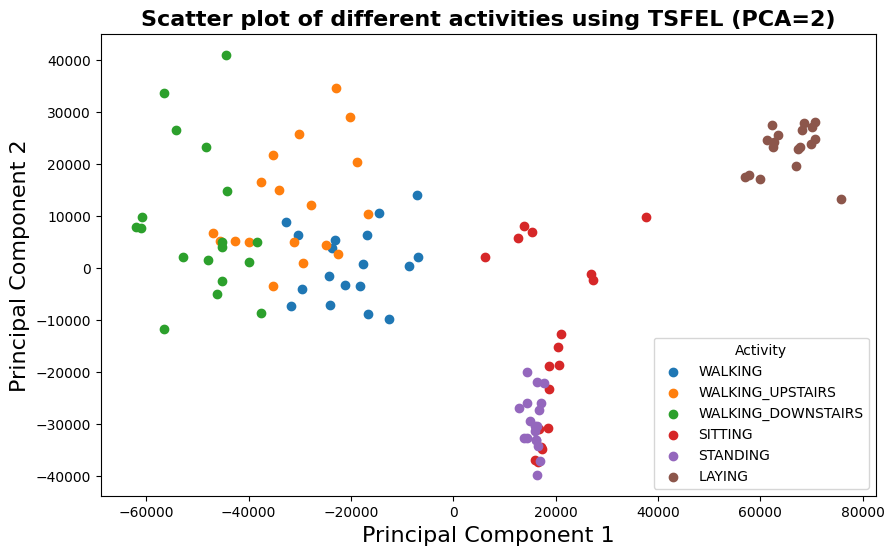

In [16]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(tsfel_df)

labels = pd.Series(df['Label'].values.reshape(-1, 500).mean(axis=1))
unique_labels = sorted(pd.unique(labels))

reversed_classes = {value: key for key, value in classes.items()}

plt.figure(figsize=(10, 6))

for label in unique_labels:
        plt.scatter(X_train_reduced[labels == label, 0], X_train_reduced[labels == label, 1], label=reversed_classes.get(label))

plt.xlabel("Principal Component 1", fontdict={'fontsize': 16})
plt.ylabel("Principal Component 2", fontdict={'fontsize': 16})
plt.legend(title="Activity", loc="lower right")
plt.title("Scatter plot of different activities using TSFEL (PCA=2)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

**Observation:** The scatter plot obtained by using the *TSFEL library* on the 3-axis accelerometer values is **significantly better** than the plot obtained by directly using *PCA* on *total linear acceleration*.

Not only are the static and dynamic activities distinguishable, individual activities have also been spaced out well.

---


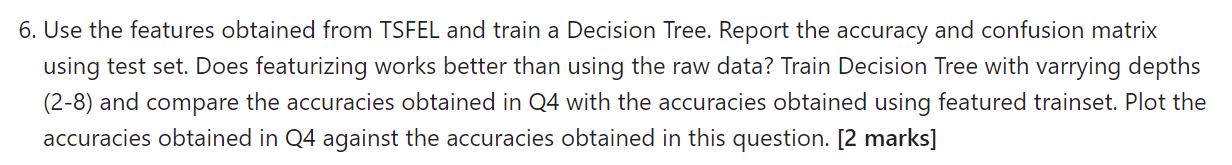

In [17]:
test_df = pd.DataFrame(X_test.reshape((-1, 3)), columns = ["Accx", "Accy", "Accz"])
test_df

Accx      Accy      Accz
0      1.117381 -0.215065 -0.119710
1      1.182103 -0.188456 -0.354849
2      1.347448 -0.161606 -0.721142
3      1.576456 -0.103646 -0.884929
4      1.812042 -0.071247 -0.746978
...         ...       ...       ...
17995  0.893984  0.106965 -0.047759
17996  0.937161  0.118597 -0.002402
17997  1.036865  0.119752  0.024042
17998  1.114417  0.129106 -0.009902
17999  1.251695  0.094013 -0.032132

[18000 rows x 3 columns]

In [18]:
cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
tsfel_test_df = tsfel.time_series_features_extractor(cfg_file, test_df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
tsfel_test_df


*** Feature extraction started ***



*** Feature extraction finished ***


Accx_Absolute energy  Accx_Area under the curve  Accx_Autocorrelation  \
0             549.806508                   9.997158            549.806508   
1             591.259140                  10.231829            591.259140   
2              13.782075                   1.639843             13.782075   
3             497.627808                   9.750052            497.627808   
4              14.637045                   1.707013             14.637045   
5             473.388932                   9.710271            473.388932   
6               0.402825                   0.279471              0.402825   
7             517.262705                   9.944005            517.262705   
8             536.762949                  10.147380            536.762949   
9             536.884333                  10.022111            536.884333   
10            512.429252                  10.103224            512.429252   
11              2.268431                   0.669929              2.268431   
12            550.221988                  10.122887            550.221988   
13            502.911032                  10.008690            502.911032   
14            564.316799                  10.133726            564.316799   
15            324.493309                   8.038875            324.493309   
16            515.385383                  10.132383            515.385383   
17            524.544546                  10.222018            524.544546   
18            470.369605                   9.452240            470.369605   
19              5.909953                   1.083408              5.909953   
20            481.930220                   9.797894            481.930220   
21            522.020367                   9.990988            522.020367   
22            501.232235                   9.776859            501.232235   
23            520.710973                  10.184543            520.710973   
24            547.068492                  10.080392            547.068492   
25            503.032571                   9.749060            503.032571   
26            580.786517                   9.813975            580.786517   
27             10.803063                   1.466016             10.803063   
28            538.119504                  10.069170            538.119504   
29            431.908676                   9.275624            431.908676   
30            316.076940                   7.934899            316.076940   
31            381.585703                   8.718459            381.585703   
32            393.499452                   8.853274            393.499452   
33            494.239264                   9.608095            494.239264   
34            477.002571                   9.495337            477.002571   
35            518.508959                  10.023608            518.508959   

    Accx_Average power  Accx_Centroid  Accx_ECDF Percentile Count_0  \
0            55.090832       4.975334                         100.0   
1            59.244403       4.956894                         100.0   
2             1.380969       5.478217                         100.0   
3            49.862506       4.977715                         100.0   
4             1.466638       4.908515                         100.0   
5            47.433761       5.001207                         100.0   
6             0.040363       4.814878                         100.0   
7            51.829930       5.003657                         100.0   
8            53.783863       5.002860                         100.0   
9            53.796025       5.054273                         100.0   
10           51.345616       4.973974                         100.0   
11            0.227298       4.809156                         100.0   
12           55.132464       4.972272                         100.0   
13           50.391887       4.969185                         100.0   
14           56.544769       4.986687                         100.0   
15           32.51

Accuracy on test data (using TSFEL): 91.66666666666666%

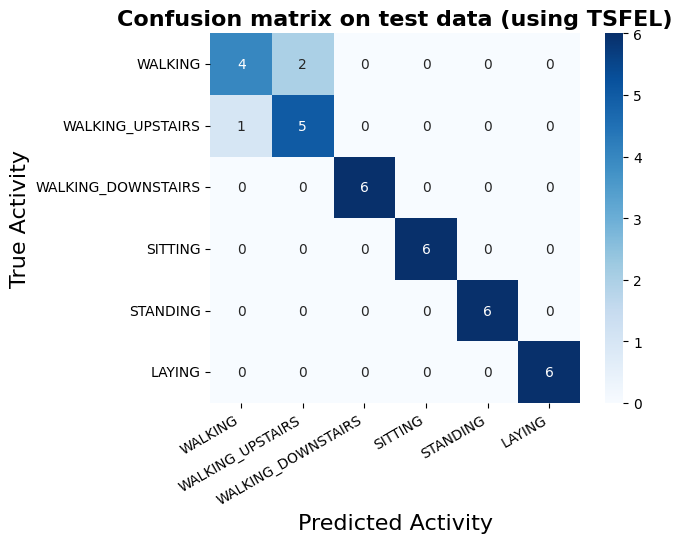

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=360)
model.fit(tsfel_df.values, y_train)
y_pred = model.predict(tsfel_test_df.values)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy on test data (using TSFEL): {accuracy * 100}%")
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.keys(), 
            yticklabels=classes.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on test data (using TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


Depth: 2
Accuracy on test data (using TSFEL): 50.0%


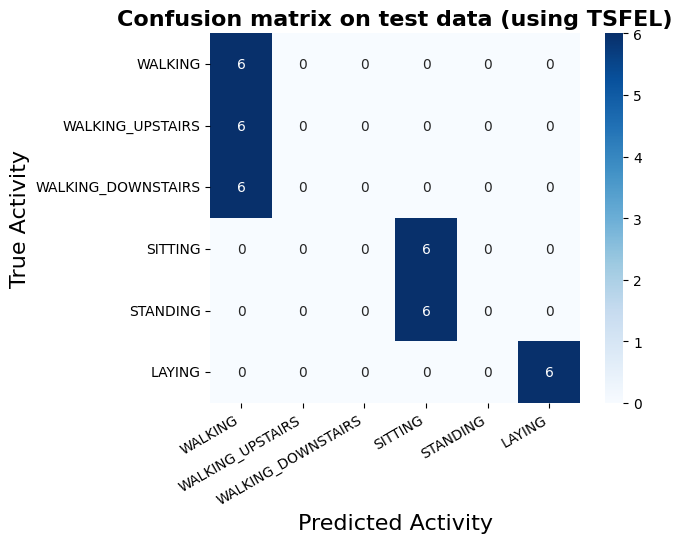


Depth: 3
Accuracy on test data (using TSFEL): 75.0%


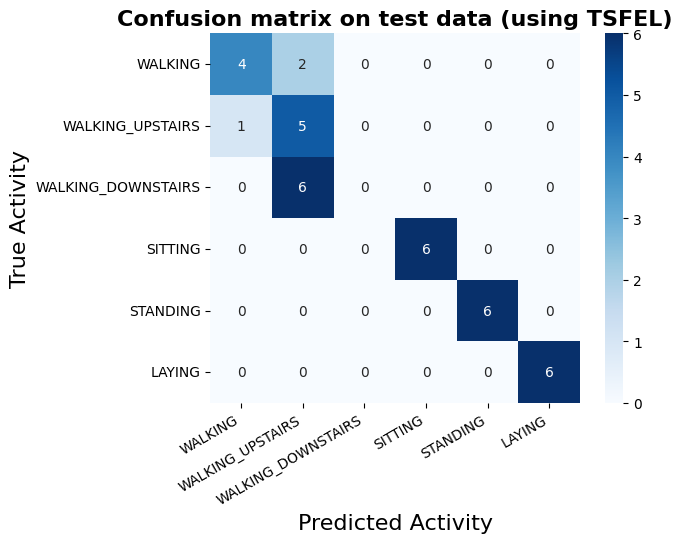


Depth: 4
Accuracy on test data (using TSFEL): 91.66666666666666%


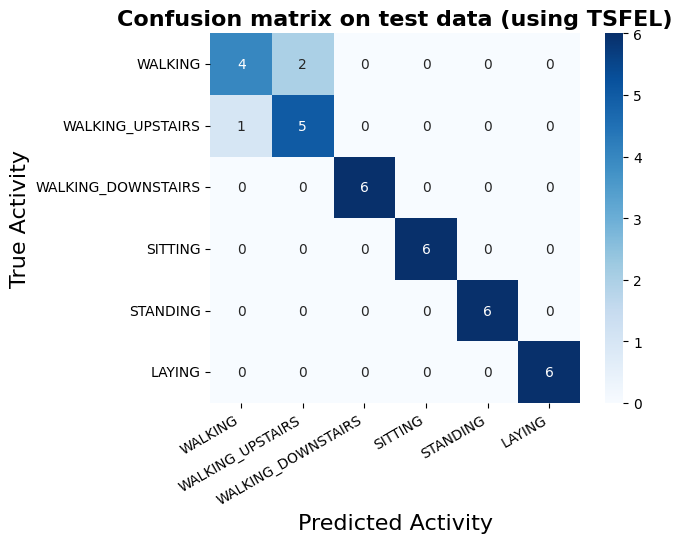


Depth: 5
Accuracy on test data (using TSFEL): 91.66666666666666%


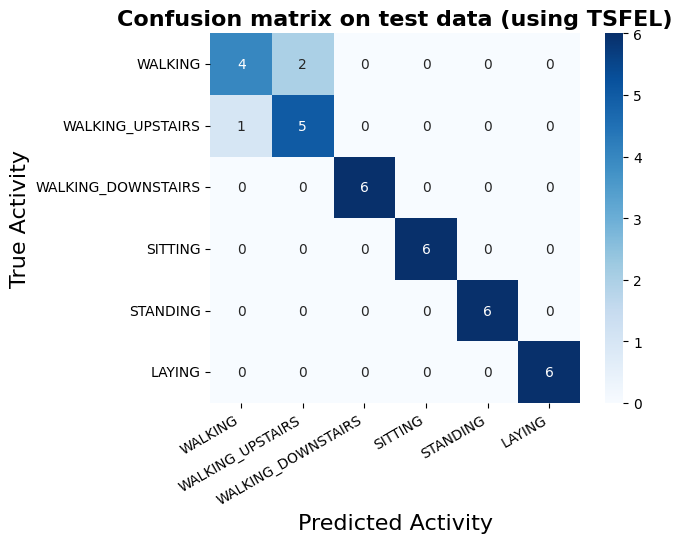


Depth: 6
Accuracy on test data (using TSFEL): 91.66666666666666%


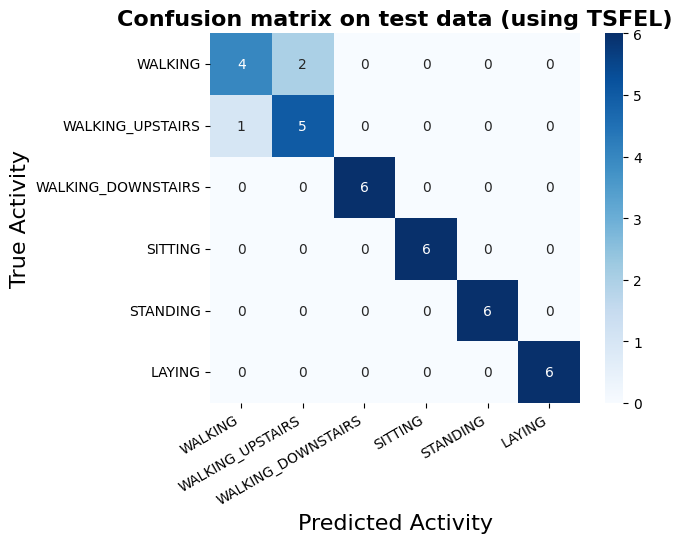


Depth: 7
Accuracy on test data (using TSFEL): 91.66666666666666%


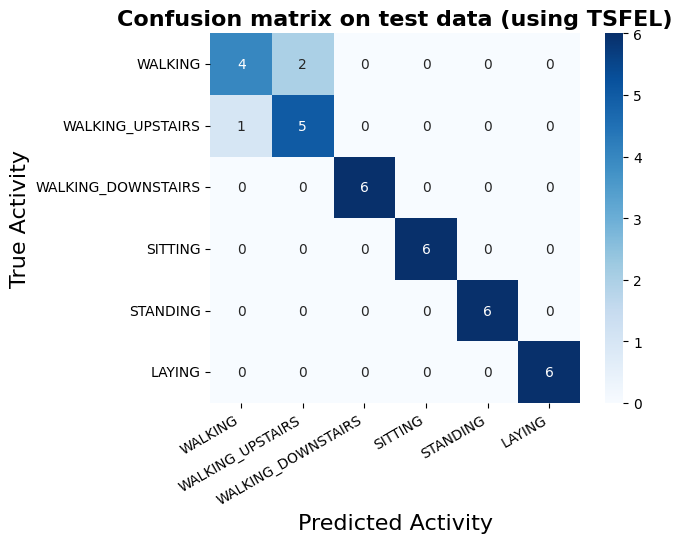


Depth: 8
Accuracy on test data (using TSFEL): 91.66666666666666%


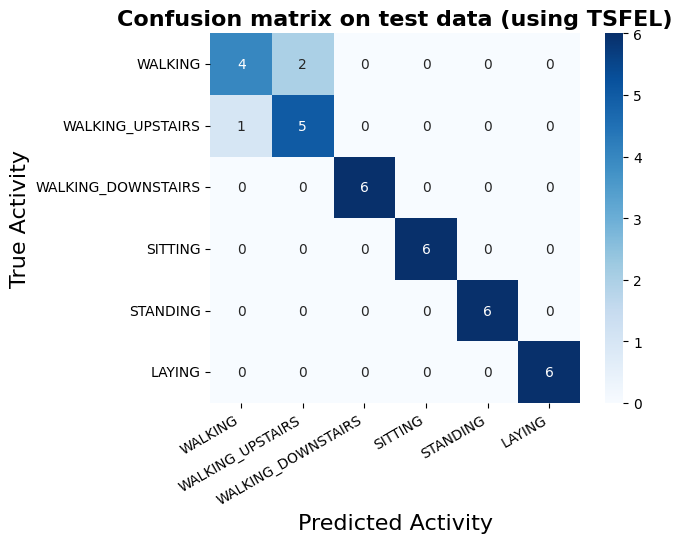

In [20]:
tsfel_accuracy_lst = []
for depth in range(2,9):
    model = DecisionTreeClassifier(random_state=360, max_depth=depth)
    model.fit(tsfel_df.values, y_train)
    y_pred = model.predict(tsfel_test_df.values)

    accuracy = accuracy_score(y_test, y_pred)
    tsfel_accuracy_lst.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Depth: {depth}")
    print(f"Accuracy on test data (using TSFEL): {accuracy * 100}%")
    sns.heatmap(conf_matrix,
                annot=True,
                square=True,
                cmap="Blues",
                fmt="d",
                xticklabels=classes.keys(), 
                yticklabels=classes.keys())
    plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
    plt.ylabel("True Activity", fontdict={'fontsize': 16})
    plt.title("Confusion matrix on test data (using TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    _ = plt.xticks(rotation=30, ha="right")
    plt.show()
    
    print("="*100, end = "\n\n")


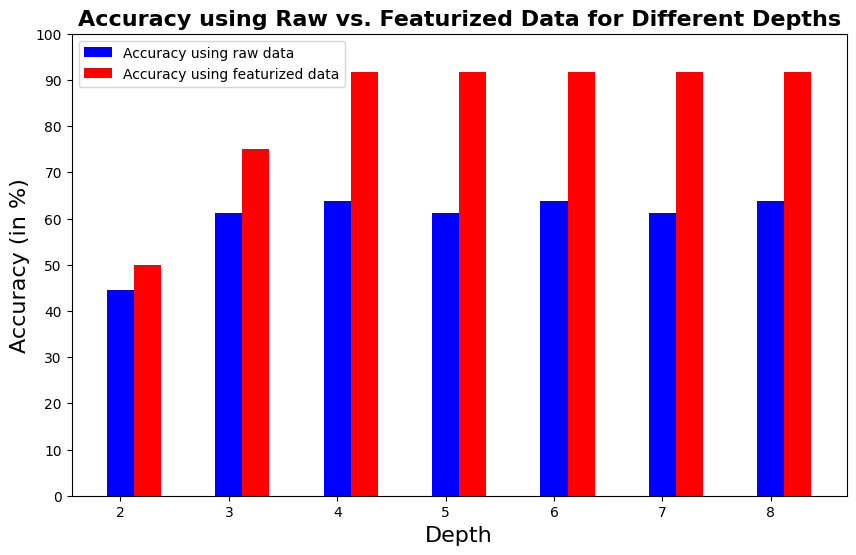

In [21]:
plt.figure(figsize=(10,6))
ind = np.arange(2,9)  
width = 0.25
plt.bar(ind, tuple(map(lambda x: 100*x, raw_accuracy_lst)), width, color = "blue", label = "Accuracy using raw data")
plt.bar(ind + width , tuple(map(lambda x: 100*x, tsfel_accuracy_lst)), width, color = "red", label = "Accuracy using featurized data")
plt.xlabel("Depth", fontdict={'fontsize': 16})
plt.ylabel("Accuracy (in %)", fontdict={'fontsize': 16})
plt.ylim((0,100))
plt.yticks(range(0,101,10))
plt.legend()
plt.title("Accuracy using Raw vs. Featurized Data for Different Depths", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

From the above bar chart and the confusion matrices obtained, it is clear that accuracies obtained from the featurized data are far better than those obtained from raw data at **all depths**. In fact, the difference between the two accuracies seem to increase with increasing depths. Also, the accuracy obtained using *TSFEL* stagnates beyond a certain depth at `91.67%`.

---

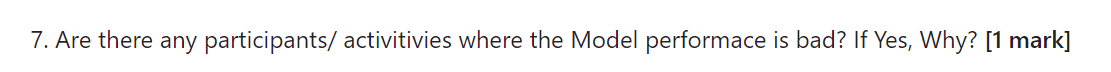

On analysing the confusion matrix of the test data obtained by using featurised trainset, there is some overlap between *walking* and *walking upstairs*. Walking was incorrectly identified as walking upstairs `2 out of 6 times`. Likewise, walking upstairs was incorretly identified as walking `1 out of 6 times`.

Walking and walking upstairs are **both dynamic activies** which involve reasonable variations of all 3 axes of the accelerometer. This makes it difficult for the model to differentiate between the two activities with 100% accuracy. Moreover, it also possible that with more training data, the differences between them can be modelled better, thereby, improving the accuracy.

---

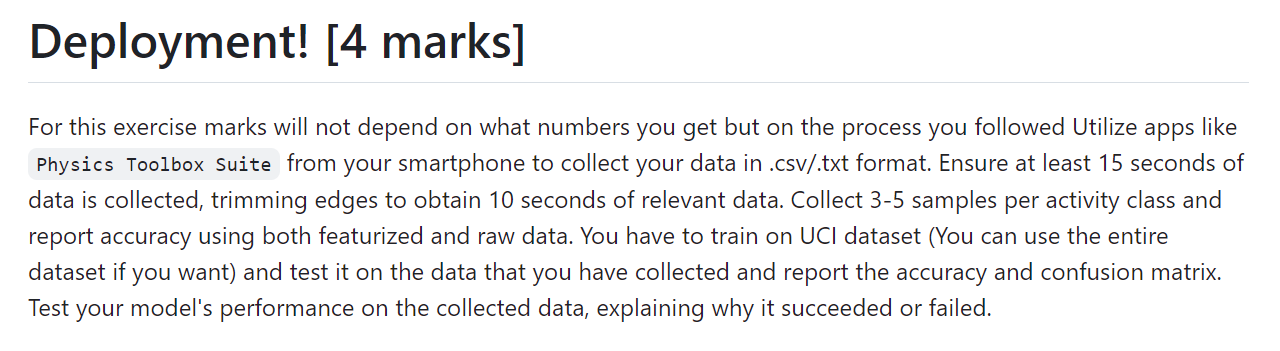

In [39]:
import pandas as pd
import os

personal_dir = os.path.join("Personal Dataset")

# Define class labels for activities
mapping = {"Walking": 1, "Upstairs": 2, "Downstairs": 3,
           "Sitting": 4, "Standing": 5, "Laying": 6}

# Initialize empty DataFrame and activity list
recorded_df = pd.DataFrame()

recorded_activities = []

# Iterate through the CSV files
for filename in ["Mrugank_Downstairs.csv", "Mrugank_Laying.csv", "Mrugank_Sitting.csv", "Mrugank_Standing.csv", "Mrugank_Upstairs.csv", "Mrugank_Walking.csv", "Omkar_Downstairs.csv", "Omkar_Laying.csv", "Omkar_Sitting.csv", "Omkar_Standing.csv", "Omkar_Upstairs.csv", "Omkar_Walking.csv", "Sriram_Downstairs.csv", "Sriram_Laying.csv", "Sriram_Sitting.csv", "Sriram_Standing.csv", "Sriram_Upstairs.csv", "Sriram_Walking.csv"]:

    # Read the CSV file
    df = pd.read_csv(os.path.join(personal_dir, filename))

    # Select only the required columns
    df = df[["ax (m/s^2)", "ay (m/s^2)", "az (m/s^2)"]].iloc[250:250+500]

    # Rename columns to Accx, Accy, Accz and scale values by 9.80665
    df.columns = ["Accx", "Accy", "Accz"]

    df = df / 9.80665
    
    # Extract activity from filename
    activity = filename.split("_")[1].split(".")[0].title()
    activity_label = mapping[activity]

    # Add the activity as a new column "Label" to the DataFrame
    df["Label"] = activity_label
    
    # Append data and activity to the respective variables
    recorded_df = pd.concat([recorded_df, df], ignore_index=True)
    recorded_activities.append(activity_label)
    
# Print the DataFrame and activity list
print(recorded_df)
print(recorded_activities)


          Accx      Accy      Accz  Label
0     0.012685 -0.701361 -0.023402      3
1     0.025350 -0.705531  0.006383      3
2     0.079732 -0.648478  0.005670      3
3     0.096904 -0.584522 -0.019099      3
4     0.055544 -0.537778 -0.061509      3
...        ...       ...       ...    ...
8995 -0.115299 -0.121152  0.093120      1
8996 -0.090296 -0.107835  0.171475      1
8997 -0.061693 -0.075143  0.167131      1
8998  0.045194 -0.045714  0.085299      1
8999 -0.006037  0.034976  0.092896      1

[9000 rows x 4 columns]
[3, 6, 4, 5, 2, 1, 3, 6, 4, 5, 2, 1, 3, 6, 4, 5, 2, 1]


### 1. Predicting the Activity using Raw Data

Accuracy on recorded data (without featurizing): 16.666666666666664%


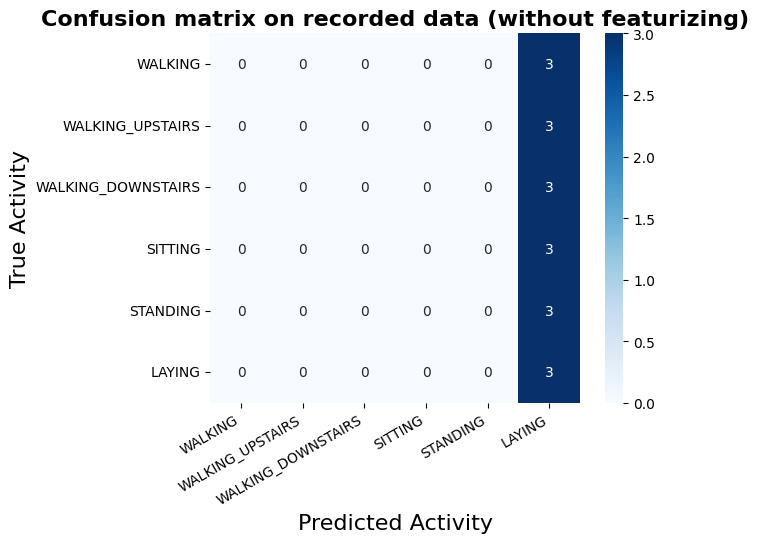

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=360)
model.fit(X_train.reshape(-1,500*3), y_train)
y_pred = model.predict(recorded_df[['Accx', 'Accy', 'Accz']].values.reshape(-1,500*3))

accuracy = accuracy_score(recorded_activities, y_pred)
conf_matrix = confusion_matrix(recorded_activities, y_pred)

print(f"Accuracy on recorded data (without featurizing): {accuracy * 100}%")
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.keys(), 
            yticklabels=classes.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on recorded data (without featurizing)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


### 2. Predicting the Activity using Featurized Data

In [40]:
import tsfel

cfg_file = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
tsfel_recorded_df = tsfel.time_series_features_extractor(cfg_file, recorded_df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
tsfel_recorded_df


*** Feature extraction started ***



*** Feature extraction finished ***


Accx_Absolute energy  Accx_Area under the curve  Accx_Autocorrelation  \
0              17.051168                   1.362070             17.051168   
1               0.001635                   0.011877              0.001635   
2               0.007681                   0.028370              0.007681   
3               0.008196                   0.029736              0.008196   
4              11.026820                   1.085851             11.026820   
5              11.047512                   1.122212             11.047512   
6               4.147519                   0.670084              4.147519   
7               0.029086                   0.047864              0.029086   
8               0.013810                   0.035043              0.013810   
9               0.007726                   0.026506              0.007726   
10              4.813065                   0.669238              4.813065   
11             13.908171                   1.017878             13.908171   
12             27.333122                   1.702897             27.333122   
13              0.038797                   0.045729              0.038797   
14              0.013449                   0.038767              0.013449   
15              0.135717                   0.106416              0.135717   
16             18.113603                   1.360670             18.113603   
17             13.097125                   1.294388             13.097125   

    Accx_Average power  Accx_Centroid  Accx_ECDF Percentile Count_0  \
0             1.708534       4.916518                         100.0   
1             0.000164       4.957687                         100.0   
2             0.000770       5.153596                         100.0   
3             0.000821       4.897811                         100.0   
4             1.104892       4.889149                         100.0   
5             1.106965       4.953632                         100.0   
6             0.415583       4.917385                         100.0   
7             0.002914       4.816155                         100.0   
8             0.001384       5.623064                         100.0   
9             0.000774       6.117764                         100.0   
10            0.482271       6.944320                         100.0   
11            1.393604       5.172009                         100.0   
12            2.738790       5.642548                         100.0   
13            0.003887       1.127759                         100.0   
14            0.001348       4.772525                         100.0   
15            0.013599       6.072618                         100.0   
16            1.814990       6.067525                         100.0   
17            1.312337       5.070453                         100.0   

    Accx_ECDF Percentile Count_1  Accx_ECDF Percentile_0  \
0                          400.0               -0.114687   
1                          400.0               -0.001611   
2                          400.0               -0.004069   
3                          400.0               -0.002529   
4                          400.0               -0.146462   
5                          400.0               -0.121550   
6                          400.0               -0.038698   
7                          400.0               -0.002305   
8                          400.0               -0.004833   
9                          400.0               -0.003283   
10                         400.0               -0.083617   
11                         400.0               -0.094079   
12                         400.0               -0.157689   
13                         400.0               -0.002947   
14                         400.0               -0.000245   
15                         400.0               -0.005670   
16                         400.0               -0.156945   
17                         400.0               -0.149827   

    Accx_ECDF Percentile_1  Accx_ECDF_0  ...  Acc

Accuracy on recorded data (using TSFEL): 33.33333333333333%


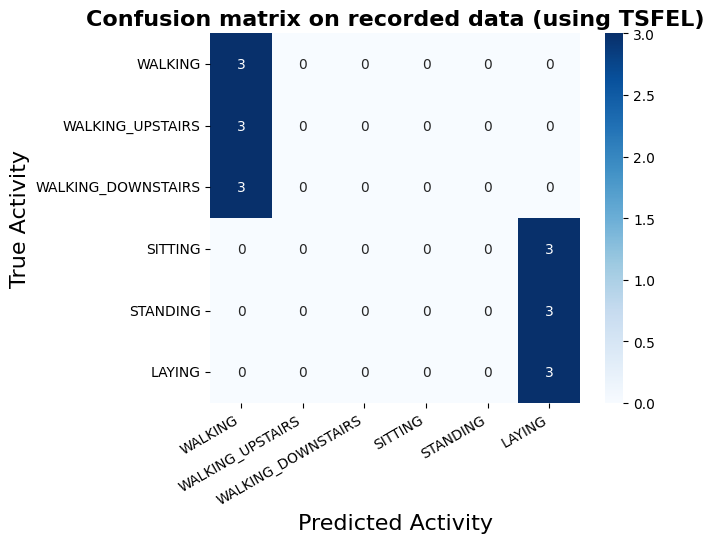

In [41]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=360)
model.fit(tsfel_df.values, y_train)
y_pred = model.predict(tsfel_recorded_df.values)

accuracy = accuracy_score(recorded_activities, y_pred)
conf_matrix = confusion_matrix(recorded_activities, y_pred)

print(f"Accuracy on recorded data (using TSFEL): {accuracy * 100}%")
sns.heatmap(conf_matrix,
            annot=True,
            square=True,
            cmap="Blues",
            fmt="d",
            xticklabels=classes.keys(), 
            yticklabels=classes.keys())
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion matrix on recorded data (using TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
_ = plt.xticks(rotation=30, ha="right")


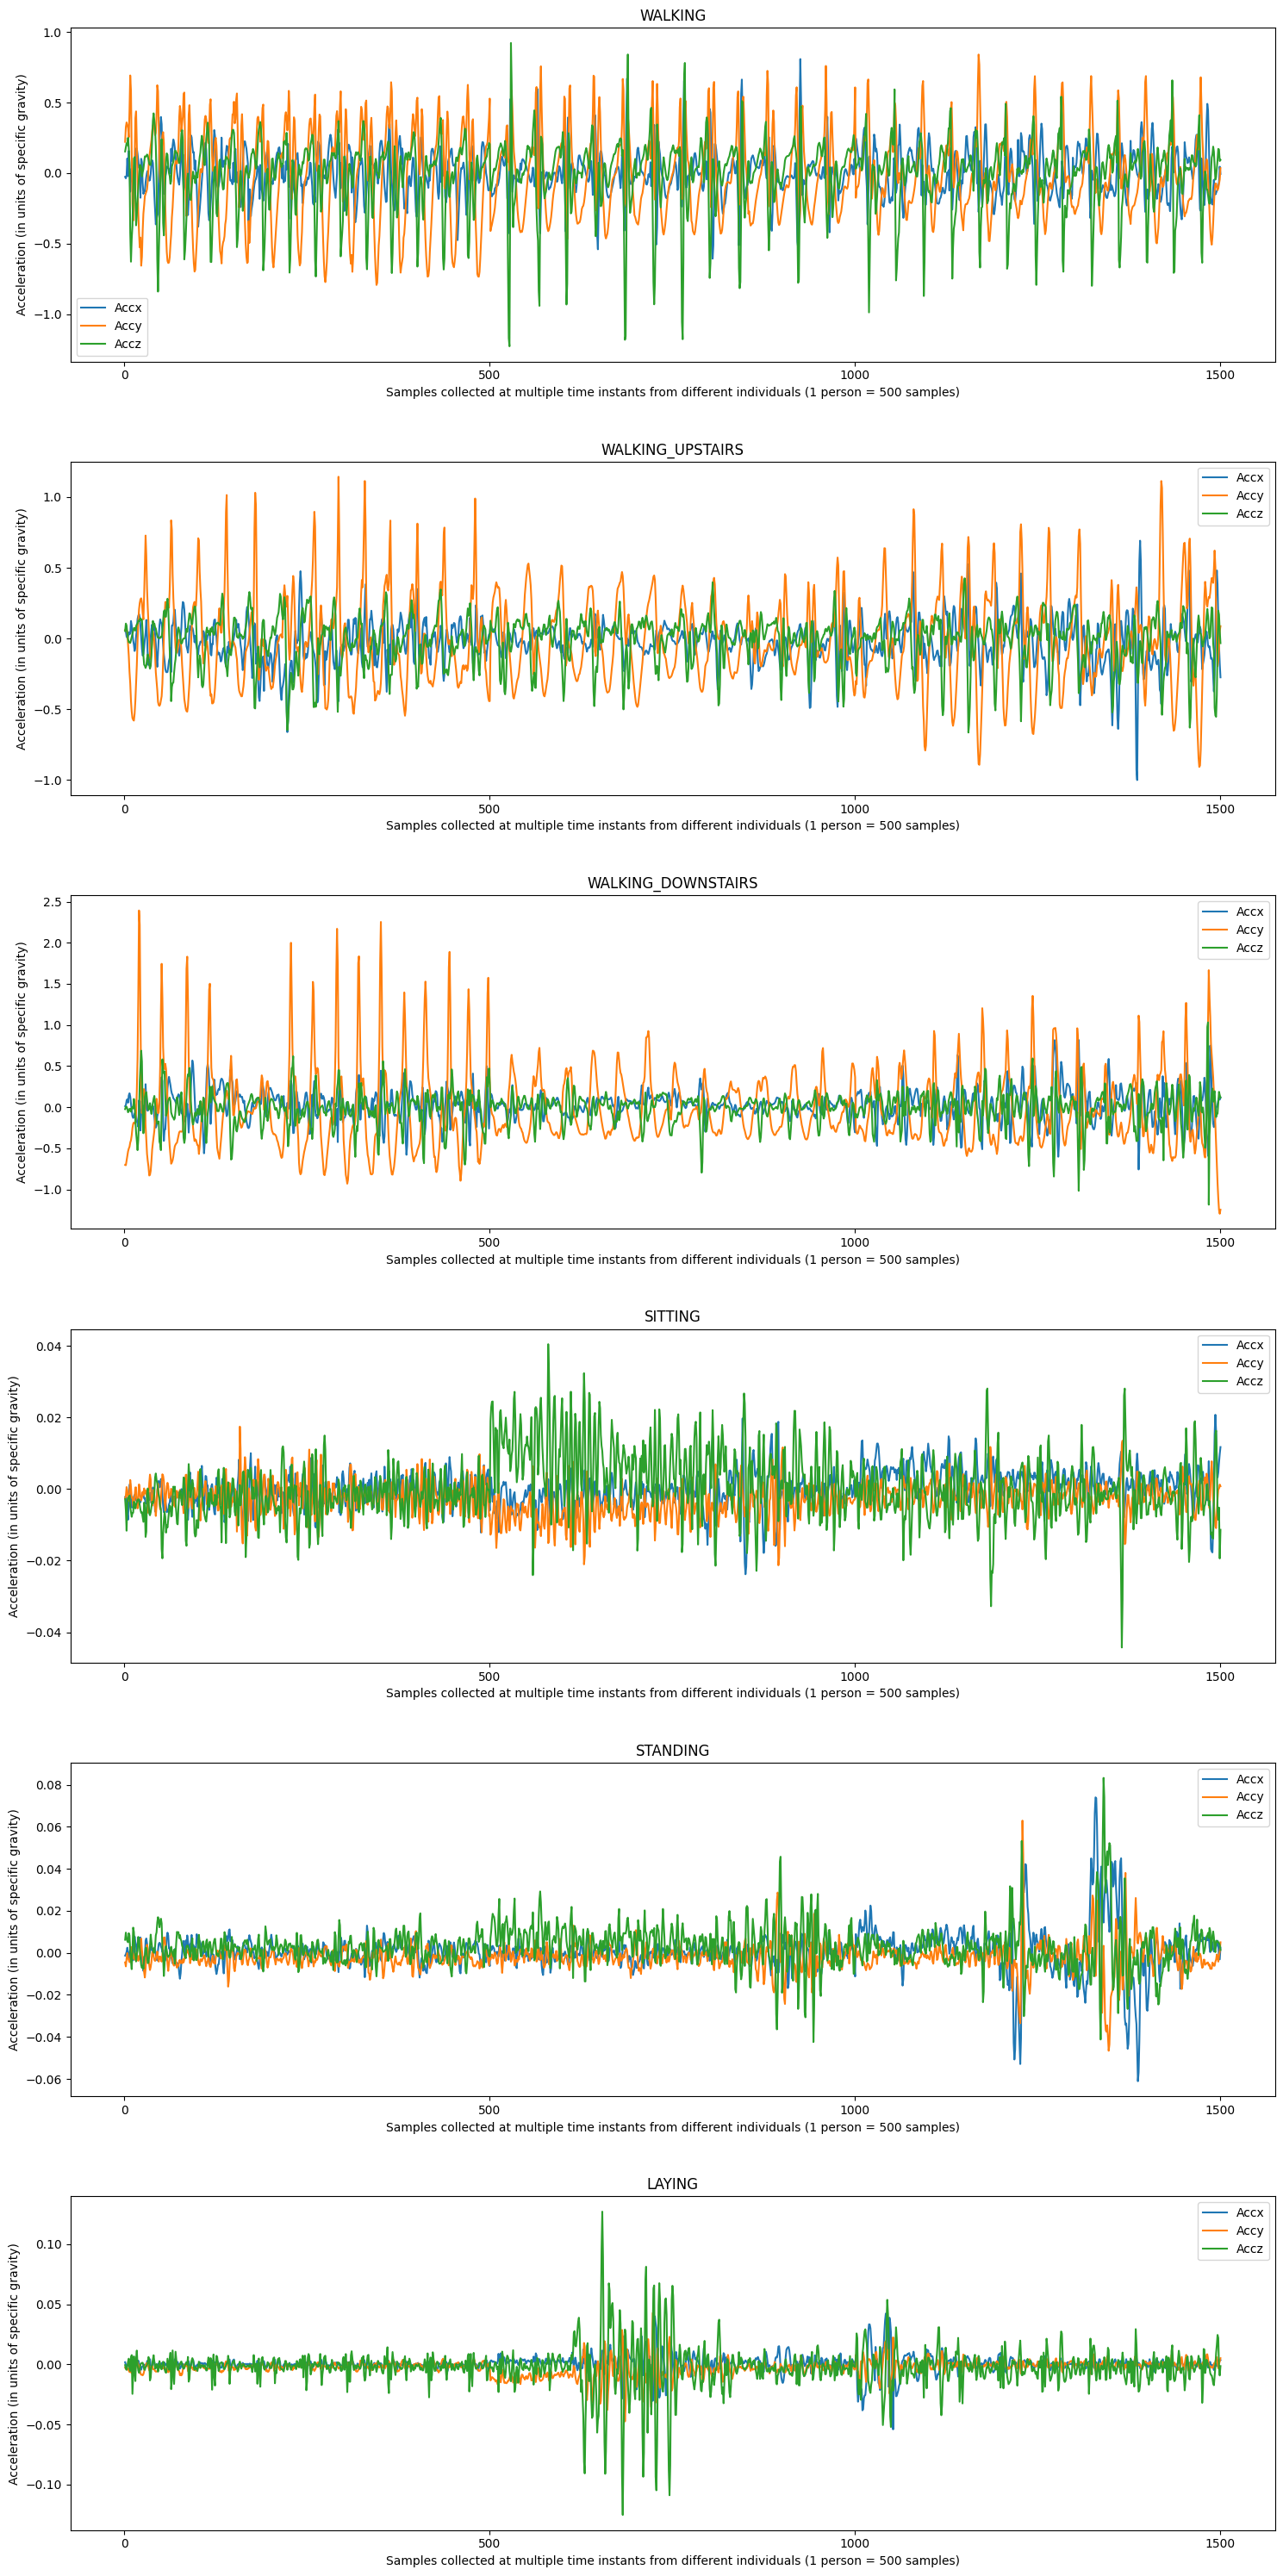

In [42]:
import matplotlib.pyplot as plt 

# Create the figure and subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

# Iterate through each label and plot the accelerations
for i, label in enumerate(classes.keys()):
    
    data = recorded_df[recorded_df["Label"] == classes[label]]
    consecutive_index = range(1, len(data) + 1)
    axes[i].plot(consecutive_index, data["Accx"], label="Accx")
    axes[i].plot(consecutive_index, data["Accy"], label="Accy")
    axes[i].plot(consecutive_index, data["Accz"], label="Accz")
    axes[i].set_xlabel("Samples collected at multiple time instants from different individuals (1 person = 500 samples)")
    axes[i].set_ylabel("Acceleration (in units of specific gravity)")
    axes[i].set_xticks(range(0, len(consecutive_index) + 1, 500),  # Ticks every 200 points
               ["{}".format(i) for i in range(0, len(consecutive_index) + 1, 500)])  # Custom labels
    axes[i].set_title(label) 
    axes[i].legend()


# Adjust layout and display the plot

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()


**Conclusion:** Accuracy of our model on the recorded data *without featurizing = `16.67%`* and *with featurizing, it doubles to become `33.33%`*. The model is able to clearly differentiate between static and dynamic activities. However, even the accuracy obtained from the featurized data is **not satisfactory** as it is lower than 50%. The model has higher chances of making incorrect predictions. 

Some of the possible reasons for this poor accuracy could be because of **limited trainset size**, **inappropriate model selection** and **imperfections in data collection** from the phone's accelerometer.
To the best of our efforts, we ensured that the orientation of the phone was kept constant and minimised edge-errors. Yet, some errors might have creeped in due to the condition of the phone, as clearly visible from the graphs of different activities plotted above.

Also, better models like *Random Forests, Gradient Boosting, Support Vector Machines, Neural Networks, K-Nearest Neighbors (KNN) and Naive Bayes* could give better results.